In [1]:
import numpy as np
from matplotlib import pyplot as plt
from simulations_jit.SimulatedAnnealing import simulated_annealing_immediately, optimal_configuration, get_E_T
from Analysis import show_points, test_configuration

#### Constant parameters

In [2]:
R = 1           # Radius of the circle
T_max = 100.    # Initial temperature
T_min = 0.001   # Final temperature
alpha = 0.9     # Temperature decay rate
iter_num = 100  # Number of iterations at each temperature

#### Test the accuracy in a single run

In [ ]:
N = 12
run_num = 100
correct_num = 0

for i in range(run_num):
    points, _ = simulated_annealing_immediately(N, R, T_max, T_min, alpha, iter_num, 1)
    correct_num += test_configuration(points, R)

print(f'Correct probability of simulated_annealing_immediately: {correct_num / run_num}')
# Result: accuracy = 0.08

Correct probability of simulated_annealing_immediately: 0.08


In [ ]:
print(f'The probability of getting a correct configuration after running 100 times is: {1-(1-0.08)**100}')
print('So we are confident that our implementation could find the optimal configuration up to 12 particles.')

0.999760788125343

#### Get optimal configurations for different N

In [18]:
N = 16          # Number of points
run_num = 100   # Number of runs

# Run simulated annealing several times to find the best configuration
points, energy = optimal_configuration(N, R, T_max, T_min, alpha, iter_num, run_num)
print(f'Minimum energy = {energy}')

Minimum energy = 116.46157928434052


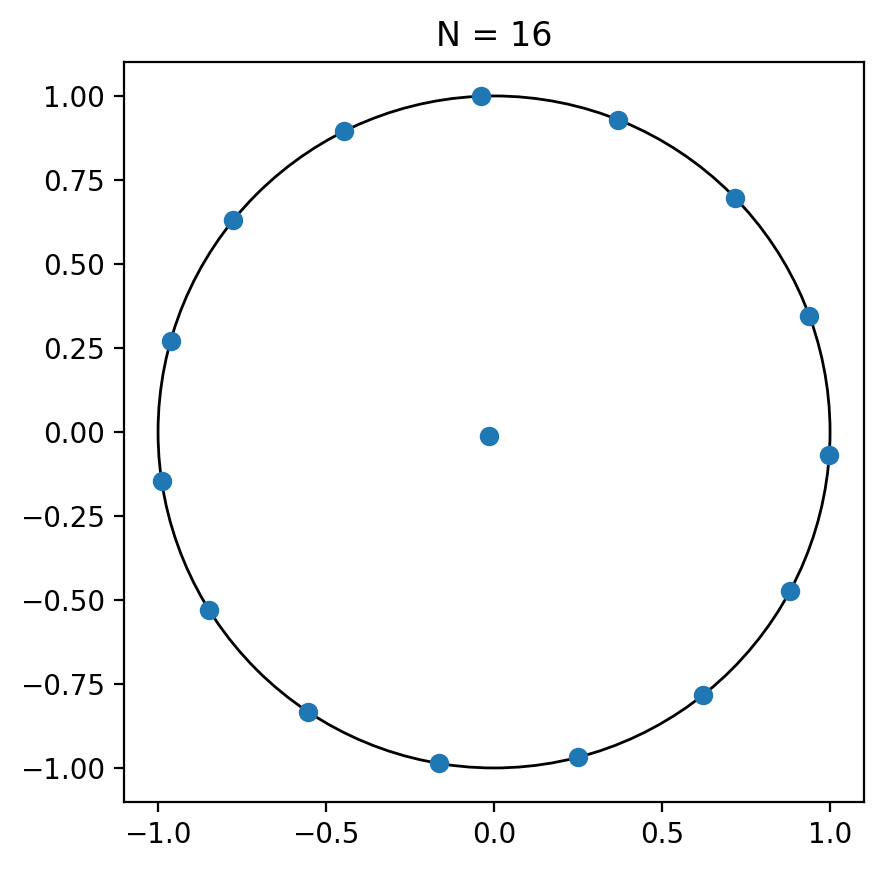

This configuration is invalid.


In [19]:
# Show the optimal configuration
show_points(points, R, dpi=200)

# Test the configuration
if test_configuration(points, R):
    print('This configuration is valid.')
else:
    print('This configuration is invalid.')

**Results**:

| N | Energy | Run time (using jit) |
|:-:|:------:|:--------------------:|
| 3 | 1.7325221911262654 | 3.6s |
| 5 | 6.88297565846019 | 13.2s |
| 7 | 16.134646440003618 | 37.0s |
| 11 | 48.582423577651326 | 2m 9.7s |
| 12 | 59.57872107241699 | 2m 40s |
| 13 | 71.81063326170198 | 3m 29.7s |
| 15 | 100.22517400726842 | 5m 49.9s |
| 16 | 116.46157928434052 | 6m 58.4s |

#### Different cooling schedules

In [4]:
N = 5
run_num = 100

**Exponential cooling schedule with different $\alpha$**

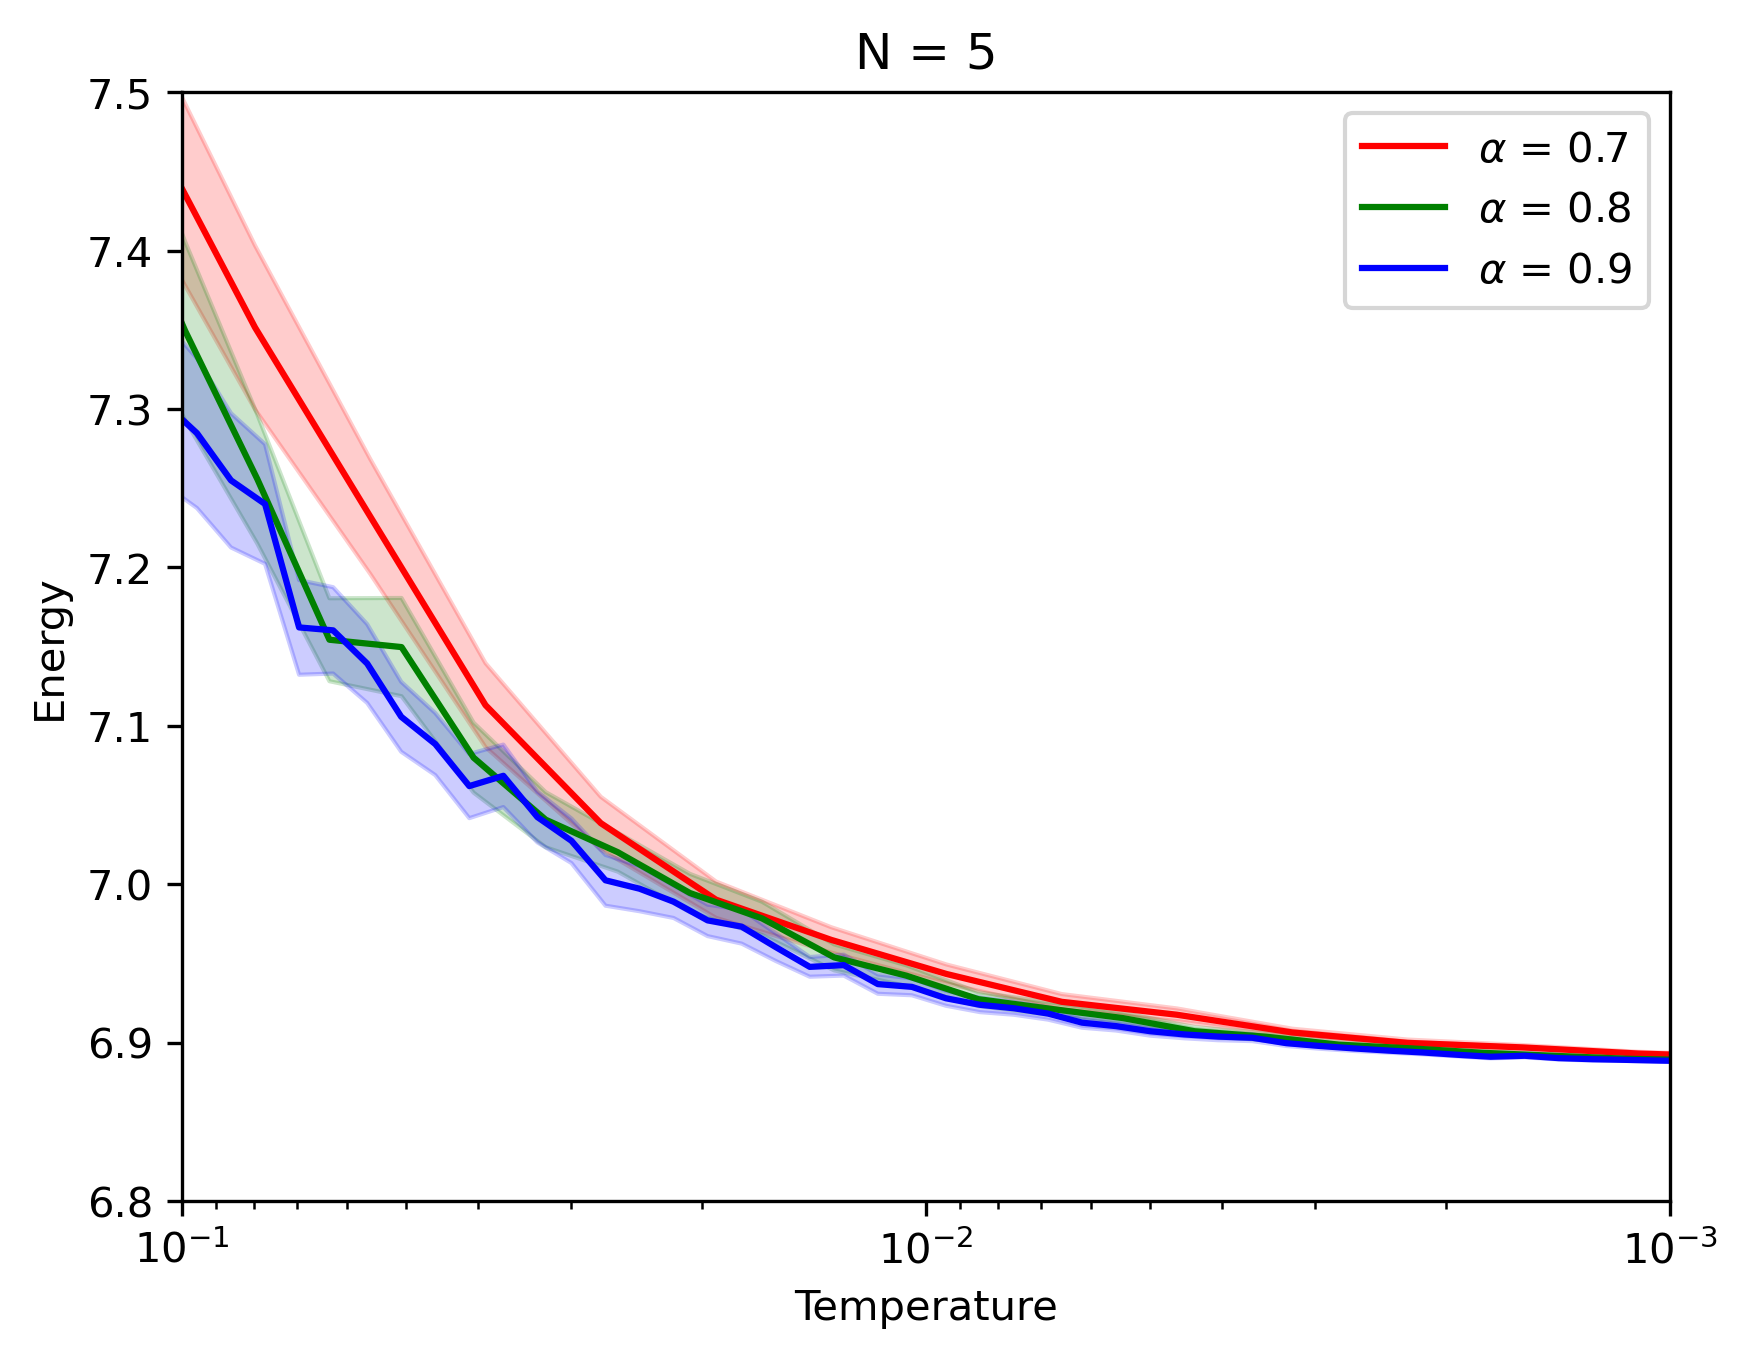

In [24]:
# E-T curve under different alpha
alphas = [0.7, 0.8, 0.9]
plt.figure(dpi=300)
plt.title(f'N = {N}')
plt.xlabel('Temperature')
plt.ylabel('Energy')
colors = ['r', 'g', 'b']

# Run simulated annealing under different alpha
for i, alpha in enumerate(alphas):
    E, T = get_E_T(N, R, T_max, T_min, alpha, iter_num, run_num)
    E_mean = np.mean(E, axis=0)
    E_std = np.std(E, axis=0, ddof=1)
    confidence_interval = 1.96 * E_std / np.sqrt(run_num)
    lower_bound = E_mean - confidence_interval
    upper_bound = E_mean + confidence_interval

    # Plot E-T curve
    plt.plot(T, E_mean, label=r'$\alpha$' + f' = {alpha}', color=colors[i])
    plt.fill_between(T, lower_bound, upper_bound, alpha=0.2, color=colors[i])

plt.xscale('log')
plt.xlim(0.1, T_min)
plt.ylim(6.8, 7.5)
plt.legend()
plt.show()

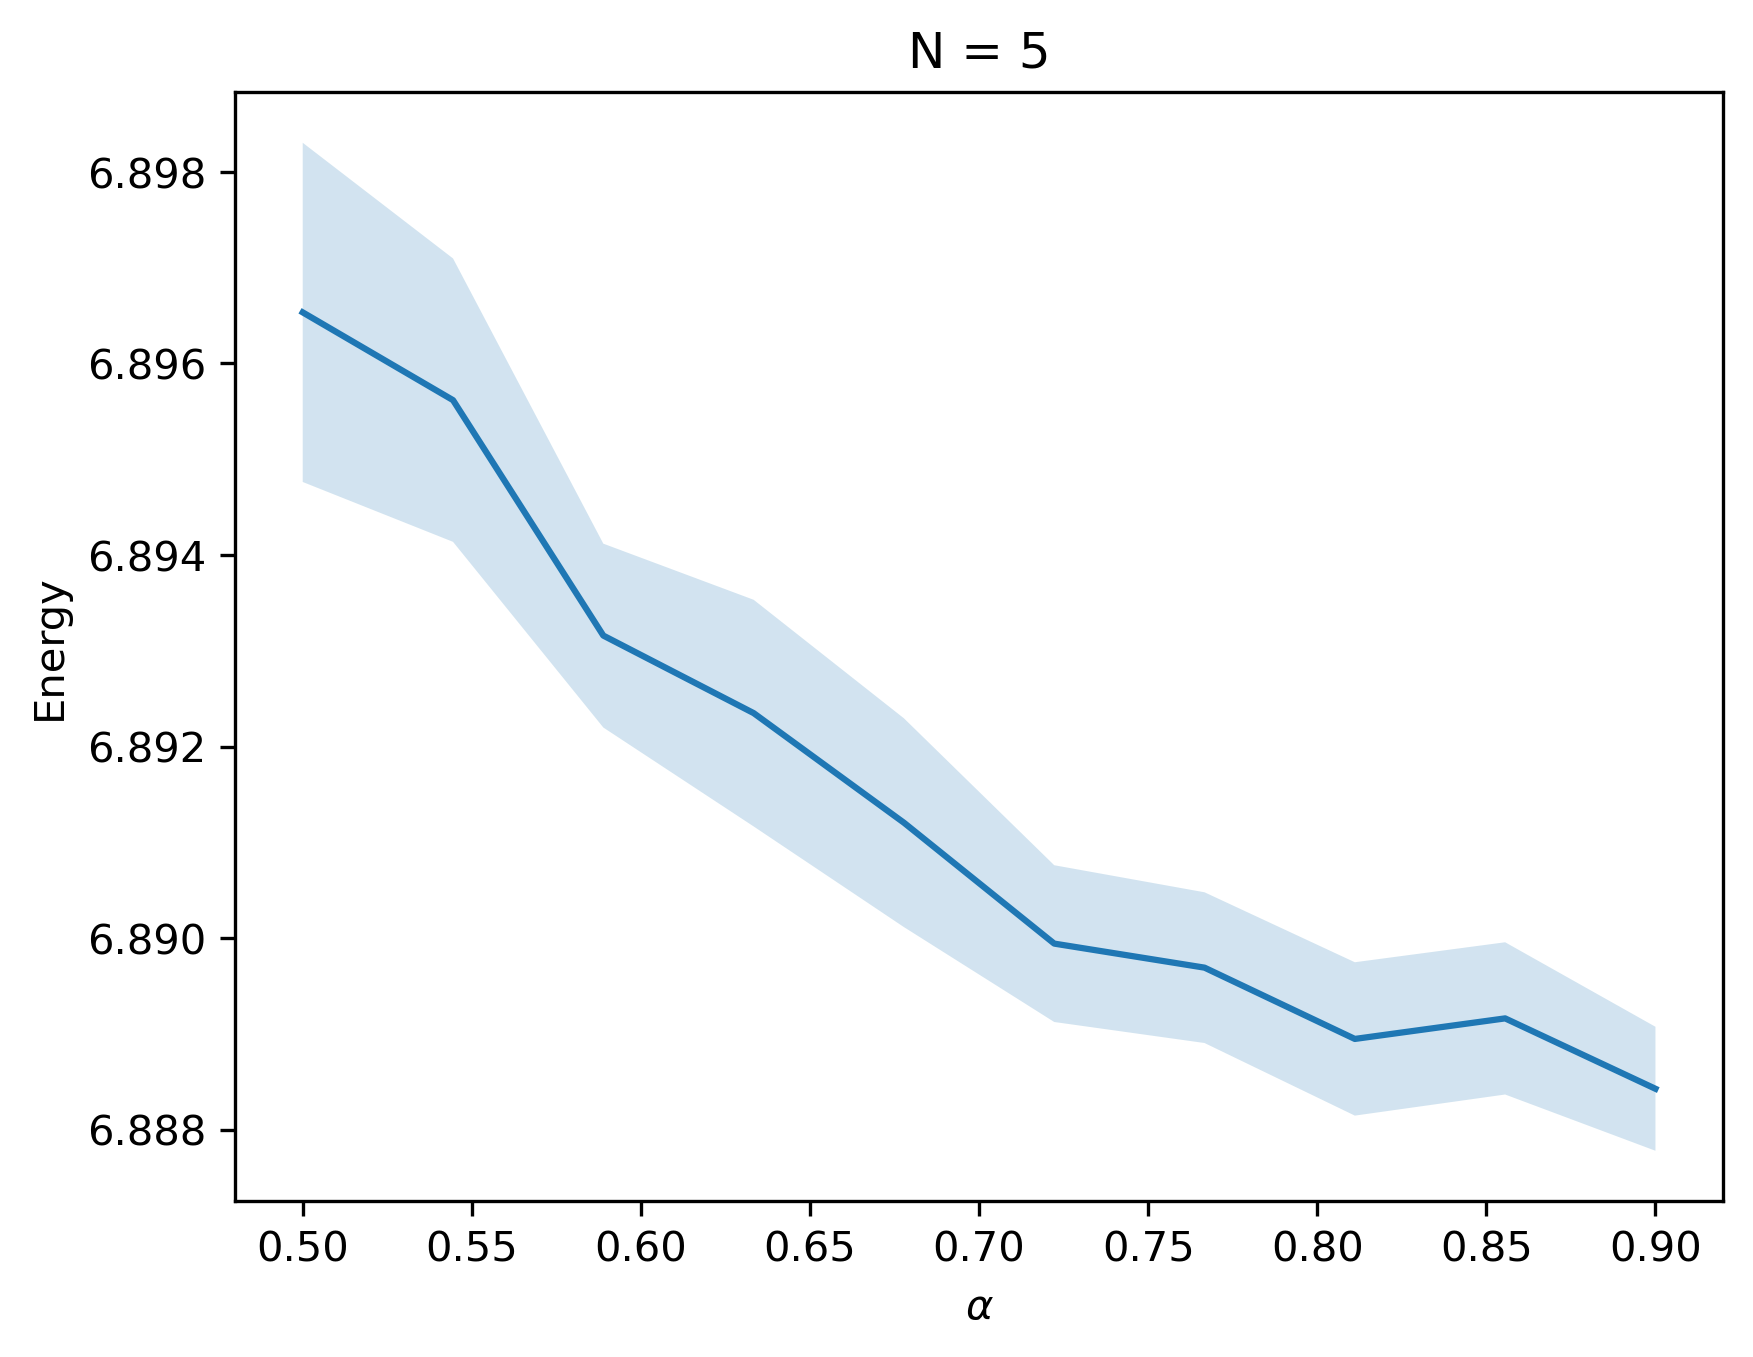

In [27]:
# Plot the final energy under different alpha
alphas = np.linspace(0.5, 0.9, 10)
E_means = []
E_conf_int = []
for alpha in alphas:
    E, _ = get_E_T(N, R, T_max, T_min, alpha, iter_num, run_num)
    E_final = E[:, -1]
    E_means.append(np.mean(E_final))
    E_conf_int.append(1.96 * np.std(E_final, ddof=1) / np.sqrt(run_num))

plt.figure(dpi=300)
plt.title(f'N = {N}')
plt.xlabel(r'$\alpha$')
plt.ylabel('Energy')
plt.plot(alphas, E_means)
plt.fill_between(alphas, np.array(E_means) - np.array(E_conf_int), np.array(E_means) + np.array(E_conf_int), alpha=0.2)
plt.show()

**Linear cooling schedule**

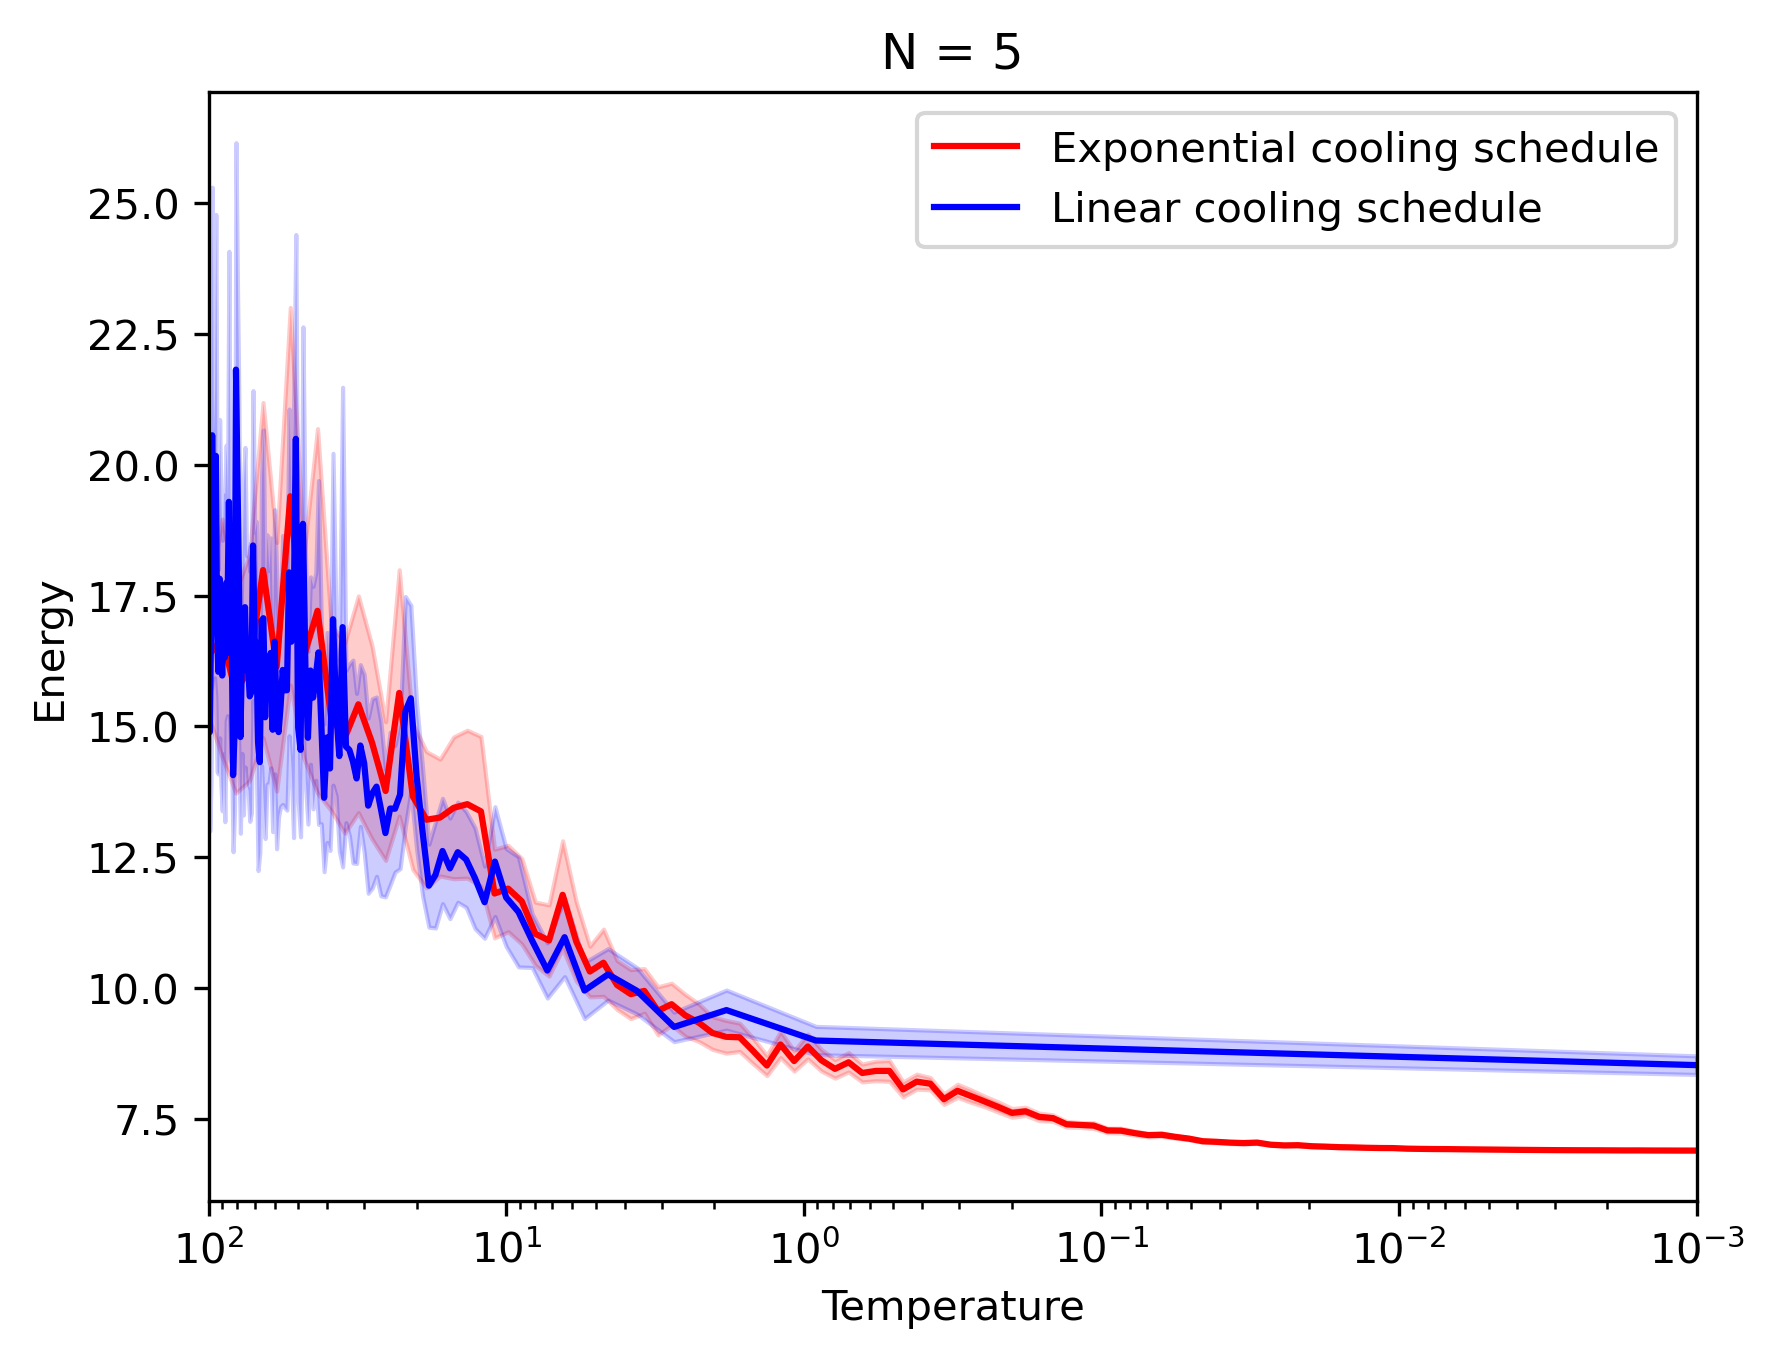

In [6]:
# Compare linear cooling schedule with exponential cooling schedule
plt.figure(dpi=300)
plt.title(f'N = {N}')
plt.xlabel('Temperature')
plt.ylabel('Energy')

# Exponential cooling schedule
alpha = 0.9
E, T = get_E_T(N, R, T_max, T_min, alpha, iter_num, run_num)
E_mean = np.mean(E, axis=0)
E_std = np.std(E, axis=0, ddof=1)
confidence_interval = 1.96 * E_std / np.sqrt(run_num)
lower_bound = E_mean - confidence_interval
upper_bound = E_mean + confidence_interval

plt.plot(T, E_mean, label='Exponential cooling schedule', color='r')
plt.fill_between(T, lower_bound, upper_bound, alpha=0.2, color='r')

# Linear cooling schedule
alpha = (T_max - T[-1]) / (len(T) - 1)
T = np.linspace(T_max, T_min, len(T))
E = []
for i in range(run_num):
    _, energy_history = simulated_annealing_immediately(N, R, T_max, T_min, alpha, iter_num, 1, cooling_schedule='linear')
    E.append(energy_history)
E_mean = np.mean(E, axis=0)
E_std = np.std(E, axis=0, ddof=1)
confidence_interval = 1.96 * E_std / np.sqrt(run_num)
lower_bound = E_mean - confidence_interval
upper_bound = E_mean + confidence_interval

plt.plot(T, E_mean, label='Linear cooling schedule', color='b')
plt.fill_between(T, lower_bound, upper_bound, alpha=0.2, color='b')
plt.xlim(T_max, T[-1])
plt.xscale('log')
plt.legend()
plt.show()

#### Different Markov Chain’s length

In [ ]:
# 